# Overfitting / underfitting

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt


from numpy.random import seed
from tensorflow import set_random_seed

Using TensorFlow backend.


In [2]:
seed(1)
set_random_seed(2)

### load data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### transform data

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Define the NN

In [6]:
# original model
# epoch: 12
# overf acc : 0.9949-0.9802 = 0.0147
# overf loss: 0.0199-0.0679 = -0.0480
# [0.06593037175243953, 0.9796]

def get_model1():    
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))
    
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return network

In [7]:
# lower capacity model
# epoch: 14
# overf acc:  0.9858-0.9740 = 0.01180
# overf loss: 0.0512-0.0923 = -0.0411
# [0.08006874090773053, 0.9756]

def get_model2():    
    network = models.Sequential()
    network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))
    
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return network

In [8]:
# lowerest capacity model
# epoch: 24
# overf acc:  0.9926-0.9748 = 0.01780
# overf loss: 0.0281-0.0867 = -0.0586
# [0.08735791617380455, 0.9742]

def get_model3():    
    network = models.Sequential()
    network.add(layers.Dense(96, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))
    
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return network

### Comment 1:
Reducing capacity has the effect of increasing the value of (min) loss and decreasing the (max) of accuracy

The extrem is reaches at higher vaue of epoch

In [9]:
# high capacity model
# epoch: 20
# overf acc: 0.01530 
# overf loss: -0.0801
# [0.11346163259886288, 0.9827]


def get_model4():    
    network = models.Sequential()
    network.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))
    
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return network

### Comment 2:

Increasing capacity has the effet to increase the accuracy but also the loss;

moreover the overfitting due to the loss is much higher

In [10]:
# model: weight regularization
# epoch: 21
# overf acc: 0.9813 -  0.9792 =  0.002100
# overf loss: 0.1218 - 0.1344 = -0.01260
# [0.16923960864543916, 0.9626]


def get_model5():    
    network = models.Sequential()
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))
    
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return network

### Comment 3

with l2 the overfitting is decreased a lot (7x for acc, 4x for loss) 

but the epoch is doubled and the final accuracy is decreased a bit

loss and acc calculated on validation much unstable, not smooth

In [11]:
# model with drop out
# epoch: 10
# overf acc : 0.0139
# overf loss: -0.048
# [0.07169178755446337, 0.9784]


def get_model6():    
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dropout(0.5))
    network.add(layers.Dense(10, activation='softmax'))
    
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return network

### Comment 4:

No clear advantage, maybe deacreased averfitting in acc and decreased epoch

In [12]:
get_model = get_model1

### hold-out validation

In [13]:
num_validation_samples = 10000

In [14]:
validation_data = train_images[:num_validation_samples]
partial_train_images = train_images[num_validation_samples:]

In [15]:
validation_labels = train_labels[:num_validation_samples]
partial_train_labels =  train_labels[num_validation_samples:]

# Fit model

In [16]:
seed(1)
set_random_seed(2)

model = get_model()

In [17]:
%%time
history = model.fit(partial_train_images, partial_train_labels, epochs=40, batch_size=512, 
          validation_data=(validation_data, validation_labels));

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 1s 27us/step - loss: 0.4392 - acc: 0.8748 - val_loss: 0.2581 - val_acc: 0.9237
Epoch 2/40
50000/50000 [==============================] - 1s 20us/step - loss: 0.1976 - acc: 0.9441 - val_loss: 0.1698 - val_acc: 0.9508
Epoch 3/40
50000/50000 [==============================] - 1s 20us/step - loss: 0.1380 - acc: 0.9607 - val_loss: 0.1394 - val_acc: 0.9592
Epoch 4/40
50000/50000 [==============================] - 1s 20us/step - loss: 0.1018 - acc: 0.9698 - val_loss: 0.1086 - val_acc: 0.9669
Epoch 5/40
50000/50000 [==============================] - 1s 21us/step - loss: 0.0794 - acc: 0.9771 - val_loss: 0.1034 - val_acc: 0.9687
Epoch 6/40
50000/50000 [==============================] - 1s 20us/step - loss: 0.0638 - acc: 0.9817 - val_loss: 0.0934 - val_acc: 0.9707
Epoch 7/40
50000/50000 [==============================] - 1s 19us/step - loss: 0.0511 - acc: 0.9855 - val_loss: 0.0975 - val_acc

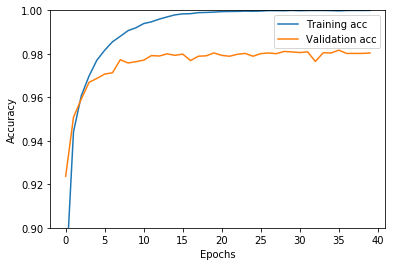

In [18]:
xx = history.epoch
yy2 = history.history['val_acc']
yy1 = history.history['acc']

plt.plot(xx,yy1, label='Training acc')
plt.plot(xx,yy2, label='Validation acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.ylim(0.9,1.0)

plt.legend()

plt.show()

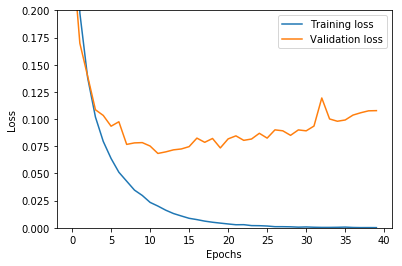

In [19]:
xx = history.epoch
yy2 = history.history['val_loss']
yy1 = history.history['loss']

plt.plot(xx,yy1, label='Training loss')
plt.plot(xx,yy2, label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.ylim(0.0,0.2)

plt.legend()

plt.show()

# After having tuned hyperparameters fit again the model with all data

In [20]:
seed(1)
set_random_seed(2)

model = get_model()

In [21]:
model.fit(train_images, train_labels, epochs=10, batch_size=512);

Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3993 - acc: 0.8862
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1779 - acc: 0.9486
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1200 - acc: 0.9653
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0892 - acc: 0.9740
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0698 - acc: 0.9797
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0550 - acc: 0.9842
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0451 - acc: 0.9869
Epoch 8/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0365 - acc: 0.9899
Epoch 9/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0296 - acc: 0.9919
Epoch 10/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0250 - acc: 0.9935

### at the end, score on the test data

In [22]:
test_score = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 61us/step


In [23]:
test_score

[0.06633696963754483, 0.9792]